# 拉格朗日(Lagrange)插值

In [1]:
# 引入必要的库
import math
import sympy
import pandas
import numpy
from typing import Callable
from sympy.core.add import Add
ufunc = Callable[[float],float]

In [2]:
def Lagrangefunc(blist:list[list[float]]) ->tuple[ufunc,Add]:    
    n = len(blist)
    sym_x = sympy.symbols("x")
    L = 0
    for k in range(n):
        l = 1
        for j in range(n):
            if j == k:
                continue
            l = l*(sym_x-blist[j][0])/(blist[k][0]-blist[j][0])
        L = L + l*blist[k][1]
    return (sympy.lambdify(sym_x,L,'math'),L)

In [3]:
def Lagrange(blist:list[list[list[float]]],x:float) -> list[float]:
    func,_ = Lagrangefunc(blist)
    return (x,func(x))

In [4]:
def multi_xLagrage(
        blist: list[list[list[float]]],
        xlist: list[float]
) -> list[list[float]]:
    xylist = list()
    for x in xlist:
        xylist.append(Lagrange(blist, x))
    return xylist


## 问题求解

In [5]:
def blist_generate(
        f: ufunc,
        interval: tuple[float, float],
        n: int
) -> list[list[float]]:
    blist = list()
    a, b = interval
    if a >= b:
        raise ValueError
    h = (b-a)/n
    for k in range(n+1):
        blist.append([a+k*h, f(a+k*h)])
    return blist


In [6]:
def multi_nLagrage(
    f: ufunc,
    interval: tuple[float, float],
    nlist: list[int]
) -> list[tuple[int, ufunc]]:
    funclist = list()
    for n in nlist:
        blist = blist_generate(f, interval, n)
        func, _ = Lagrangefunc(blist)
        funclist.append((n, func))
    return funclist

In [7]:
def pd_process(xlist:list[float],pd:pandas.DataFrame):
    pd_ = pd.copy()
    for x in xlist:
        s = list()
        for f in pd_['P_n']:
            s.append(f(x))
        pd_[x]=s
    pd_=pd_.iloc[:,1:]
    pd_=pd_.T
    return pd_.copy()

### 问题 1

#### (1)
设 $f(x)=\cfrac{1}{1+x^2},~x\in[-5,5]$, 考虑等距节点的拉格朗日插值多项式 $P_n(x)$, 即将区间 $[-5,5]$ 进行 $n$ 等分, 构造 $P_n(x)$, 利用拉格朗日插值多项式 $P_n(x)$ 作为 $f(x)$ 的近似值. 分别取 $n=5,10,20$, 同时计算 $P_n(x)$ 在 $x=0.75,1.75,2.75,3.75,4.75$ 处的函数值. 

In [8]:
f = lambda x: 1.0/(1+x**2)
inteval1 = (-5,5)
xlist1=[0.75,1.75,2.75,3.75,4.75]
nlist1=[5,10,20]
Plist_1=multi_nLagrage(f,inteval1,nlist1)
Plist_1.append((-1,f))
pd1=pandas.DataFrame(Plist_1,columns=['n','P_n'])
pd1.set_index(['n'],inplace=True)
pd1_1=pd_process(xlist1,pd1)
print(pd1_1)

n           5         10         20       -1 
0.75  0.528974  0.678990   0.636755  0.640000
1.75  0.373325  0.190580   0.238446  0.246154
2.75  0.153733  0.215592   0.080660  0.116788
3.75 -0.025954 -0.231462  -0.447052  0.066390
4.75 -0.015738  1.923631 -39.952449  0.042440


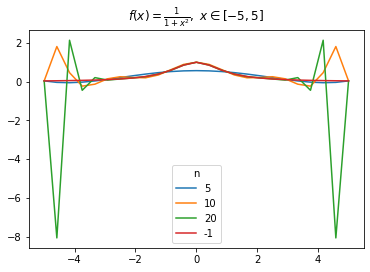

In [9]:
pd1_2=pd_process(numpy.linspace(-5,5,25).tolist(),pd1)
#pd1_2.plot(title=r'$f(x)=\frac{1}{1+x^2},~x\in[-5,5]$')
pd1_2.plot(title=r'$f(x)=\frac{1}{1+x^2},~x\in[-5,5]$').get_figure().savefig("./img/Lab1/1_1",dpi=700)

#### (2)
设 $f(x)=e^{x},~x\in[-1,1]$, 考虑等距节点的拉格朗日插值多项式 $P_n(x)$, 即将区间 $[-1,1]$ 进行 $n$ 等分, 构造 $P_n(x)$, 利用拉格朗日插值多项式 $P_n(x)$ 作为 $f(x)$ 的近似值. 分别取 $n=5,10,20$, 同时计算 $P_n(x)$ 在 $x=-0.95,-0.05,0.05,0.95$ 处的函数值. 

In [10]:
f = lambda x: math.exp(x)
inteval2 = (-1,1)
xlist2=[-0.95,-0.05,0.05,0.95]
nlist2=[5,10,20]
Plist_2=multi_nLagrage(f,inteval2,nlist2)
Plist_2.append((-1,f))
pd2=pandas.DataFrame(Plist_2,columns=['n','P_n'])
pd2.set_index(['n'],inplace=True)
pd2_1=pd_process(xlist2,pd2)
print(pd2_1)

n            5         10        20       -1 
-0.95  0.386798  0.386741  0.386741  0.386741
-0.05  0.951248  0.951229  0.951229  0.951229
0.05   1.051290  1.051271  1.051271  1.051271
0.95   2.585785  2.585710  2.585710  2.585710


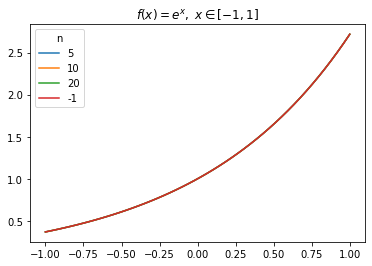

In [11]:
pd2_2=pd_process(numpy.linspace(-1,1,50).tolist(),pd2)
#pd2_2.plot(title=r'$f(x)=e^{x},~x\in[-1,1]$')
pd2_2.plot(title=r'$f(x)=e^{x},~x\in[-1,1]$').get_figure().savefig("./img/Lab1/2_1.png",dpi=700)

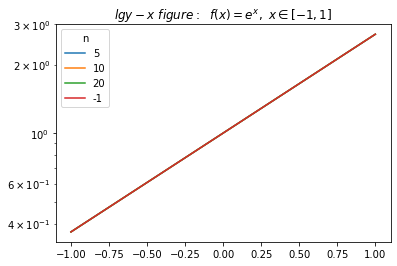

In [12]:
pd2_2.plot(logy=True,title=r'$lgy-x~figure:~~f(x)=e^{x},~x\in[-1,1]$').get_figure().savefig("./img/Lab1/2_2.png",dpi=700)

### 问题2

#### (1)
设 $f(x)=\cfrac{1}{1+x^2},~x\in[-1,1]$, 考虑等距节点的拉格朗日插值多项式 $P_n(x)$, 即将区间 $[-1,1]$ 进行 $n$ 等分, 构造 $P_n(x)$, 利用拉格朗日插值多项式 $P_n(x)$ 作为 $f(x)$ 的近似值. 分别取 $n=5,10,20$, 同时计算 $P_n(x)$ 在 $x=-0.95,-0.05,0.05,0.95$ 处的函数值. 

In [13]:
f = lambda x: 1.0/(1+x**2)
inteval3 = (-1,1)
xlist3=[-0.95,-0.05,0.05,0.95]
nlist3=[5,10,20]
Plist_3=multi_nLagrage(f,inteval3,nlist3)
Plist_3.append((-1,f))
pd3=pandas.DataFrame(Plist_3,columns=['n','P_n'])
pd3.set_index(['n'],inplace=True)
pd3_1=pd_process(xlist3,pd3)
print(pd3_1)

n            5         10        20       -1 
-0.95  0.517147  0.526408  0.525620  0.525624
-0.05  0.992791  0.997507  0.997506  0.997506
0.05   0.992791  0.997507  0.997506  0.997506
0.95   0.517147  0.526408  0.525620  0.525624


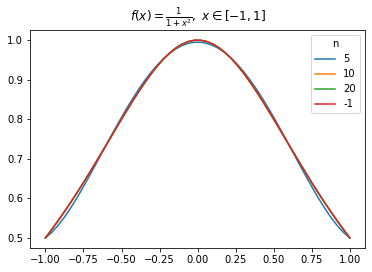

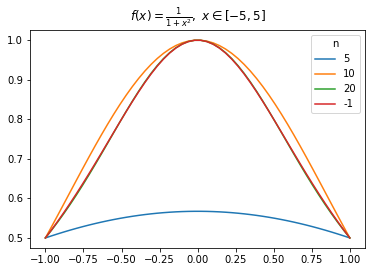

In [14]:
pd3_2=pd_process(numpy.linspace(-1,1,50).tolist(),pd3)
pd3_2.plot(title=r'$f(x)=\frac{1}{1+x^2},~x\in[-1,1]$').get_figure().savefig("./img/Lab1/3_1",dpi=700)
pd1_3=pd_process(numpy.linspace(-1,1,50).tolist(),pd1)
pd1_3.plot(title=r'$f(x)=\frac{1}{1+x^2},~x\in[-5,5]$').get_figure().savefig("./img/Lab1/3_2",dpi=700)

#### (2)
设 $f(x)=e^{x},~x\in[-5,5]$, 考虑等距节点的拉格朗日插值多项式 $P_n(x)$, 即将区间 $[-5,5]$ 进行 $n$ 等分, 构造 $P_n(x)$, 利用拉格朗日插值多项式 $P_n(x)$ 作为 $f(x)$ 的近似值. 分别取 $n=5,10,20$, 同时计算 $P_n(x)$ 在 $x=-4.75,-0.25,0.25,4.75$ 处的函数值. 

In [15]:
f = lambda x: math.exp(x)
inteval4 = (-1,1)
xlist4=[-4.75,-0.25,0.25,4.75]
nlist4=[5,10,20]
Plist_4=multi_nLagrage(f,inteval4,nlist4)
Plist_4.append((-1,f))
pd4=pandas.DataFrame(Plist_4,columns=['n','P_n'])
pd4.set_index(['n'],inplace=True)
pd4_1=pd_process(xlist4,pd4)
print(pd4_1)

n             5           10             20         -1 
-4.75  -8.946983    0.463755  524288.000000    0.008652
-0.25   0.778792    0.778801       0.778801    0.778801
0.25    1.284016    1.284025       1.284025    1.284025
4.75   77.924295  114.555505  360448.000000  115.584285


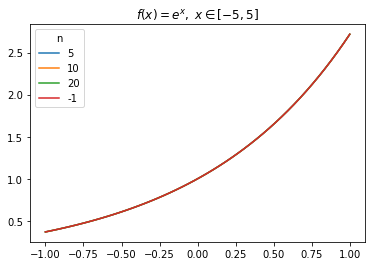

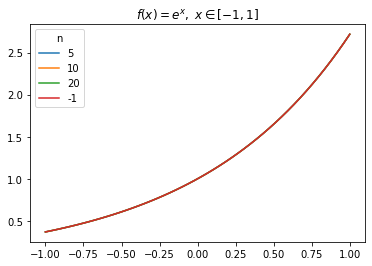

In [16]:
pd4_2=pd_process(numpy.linspace(-1,1,50).tolist(),pd4)
pd4_2.plot(title=r'$f(x)=e^x,~x\in[-5,5]$').get_figure().savefig("./img/Lab1/4_1",dpi=700)
pd2_3=pd_process(numpy.linspace(-1,1,50).tolist(),pd2)
pd2_3.plot(title=r'$f(x)=e^x,~x\in[-1,1]$').get_figure().savefig("./img/Lab1/4_2",dpi=700)

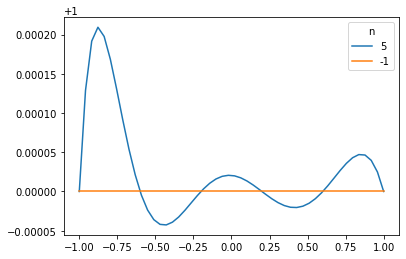

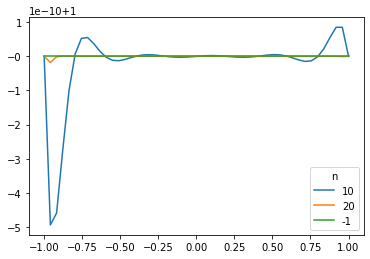

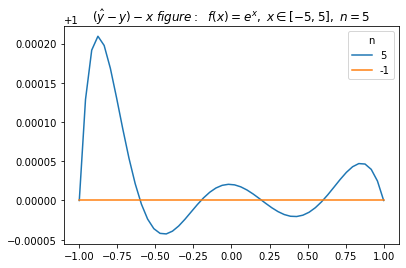

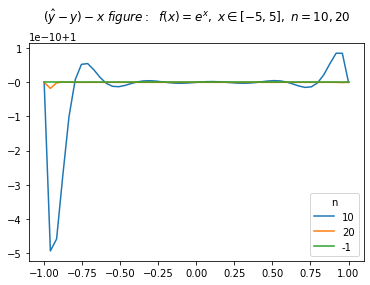

In [17]:
pd4_2.div(pd2_3.iloc[:,-1],axis=0).iloc[:,[0,-1]].plot()
pd4_2.div(pd2_3.iloc[:,-1],axis=0).iloc[:,1:].plot()
pd2_3.div(pd2_3.iloc[:,-1],axis=0).iloc[:,[0,-1]].plot(title=r'$(\hat{y}-y)-x~figure:~~f(x)=e^x,~x\in[-5,5],~n=5$').get_figure().savefig("./img/Lab1/2_4",dpi=700)
pd2_3.div(pd2_3.iloc[:,-1],axis=0).iloc[:,1:].plot(title=r'$(\hat{y}-y)-x~figure:~~f(x)=e^x,~x\in[-5,5],~n=10,20$'+'\n').get_figure().savefig("./img/Lab1/2_3",dpi=700)